In [1]:
import h5py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/om2382/mft-theory/')
from empirics import random_derangement

In [ ]:
path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5?download=1'
with h5py.File(path, "r") as f:
    ccov = 0
    var = 0
    r_mean = 0
    T = f["T_all"][:,0].shape[0]
    N = f["T_all"][0,:].shape[0]
    for i_t, t in enumerate(range(0, T, 5)):
        if t%1000 == 0:
            print(t)
        r_mean += f["T_all"][i_t]
    r_mean = r_mean / (i_t + 1)
    shuffle_idx = random_derangement(N)
    print('done with mean')
    for i_t, t in enumerate(range(0, T, 5)):
        if t%1000 == 0:
            print(t)
        r1 = f["T_all"][t,:] - r_mean
        r2 = r1[list(shuffle_idx)]
        ccov += r1*r2
        var += r1*r1
    ccov = ccov/i_t
    var = var/i_t

In [ ]:
plt.hist(np.log10(var**2), bins=100)
plt.hist(np.log10(ccov**2), bins=100)

In [ ]:
_ = plt.hist(np.log10(var**2), bins=100)
_ = plt.hist(np.log10(ccov**2), bins=100)

In [ ]:
plt.hist(np.log10(var), bins=100)

In [ ]:
np.mean(var)**2 / (np.mean(var**2) + np.mean(ccov**2)*N) * N

In [ ]:
np.mean(var)**2 / (np.mean(var**2))

In [ ]:
path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5?download=1'
with h5py.File(path, "r") as f:
    acov = 0
    var = 0
    r_mean = 0
    T = f["T_all"][:,0].shape[0]
    N = f["T_all"][0,:].shape[0]
    N_sample = 1000
    i_sample = sorted(np.random.choice(range(0, N), N_sample, replace=False))
    #for i_t, t in enumerate(range(0, T, 1)):
    #    if t%1000 == 0:
    #        print(t)
    #    r_mean += f["T_all"][i_t, i_sample]
    r_mean = f["T_all"][:,i_sample].mean(0)
    print('done with mean')
    r = f["T_all"][:,i_sample] - r_mean
    fpower = np.mean(np.abs(np.fft.rfft(r, axis=0, norm='ortho'))**2, axis=1)
    acov = np.fft.irfft(fpower, axis=0)

In [ ]:
path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5?download=1'
with h5py.File(path, "r") as f:
    T = f["T_all"][:,0].shape[0]
    N = f["T_all"][0,:].shape[0]
    r_mean = 0
    N_sample = 200
    i_sample = sorted(np.random.choice(range(0, N), N_sample, replace=False))
    for i_t, t in enumerate(range(0, T, 10)):
        if t%1000 == 0:
            print(t)
        r_mean += f["T_all"][i_t, i_sample]
    r_mean= r_mean / (i_t + 1)
    r = f["T_all"][:,i_sample] - r_mean
    fpower = np.abs(np.fft.rfft(r, axis=0, norm='ortho'))**2
    acov = np.fft.irfft(fpower, axis=0)

In [ ]:
path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5?download=1'
with h5py.File(path, "r") as f:
    T = f["T_all"][:,0].shape[0]
    N = f["T_all"][0,:].shape[0]
    r_mean = 0
    N_sample = 200
    i_sample = sorted(np.random.choice(range(0, N), N_sample, replace=False))
    r = f["T_all"][:,i_sample]
    r = r - r.mean(0)
    #r = f["T_all"][:,i_sample] - r_mean
    fpower = np.abs(np.fft.rfft(r, axis=0, norm='ortho'))**2
    acov = np.fft.irfft(fpower, axis=0)

In [ ]:
path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5?download=1'
with h5py.File(path, "r") as f:
    T, N = f["T_all"].shape
    transposed_data = np.zeros((N, T))
    for t in range(T):
        if t%10 == 0:
            print(t)
        transposed_data[:,t] = f["T_all"][t,:]
t_path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1_transpose.h5'
with h5py.File(t_path, 'w') as f:
    f["T_all_transpose"] = transposed_data

In [ ]:
path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5?download=1'
with h5py.File(path, "r") as f:
    print([k for k in f.keys()])

In [ ]:
for i in range(N_sample):
    plt.plot(times, acov[:100,i]/acov[0,i], color='C0', alpha=0.2)
plt.xlabel('Lag (s)')
plt.ylabel('Normalized autocov')

In [ ]:
path = '/home/om2382/datasets/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5?download=1'
with h5py.File(path, "r") as f:
    times = f["t"][:100]

In [ ]:
!ls ~/datasets

In [5]:
path = '/mnt/smb/locker/litwin-kumar-locker/om2382/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1_transpose.h5'
with h5py.File(path, "r") as f:
    X = f['T_all_transpose'][:,:]
    X_mean = X.mean(1)

In [4]:
X_demeaned = X - X_mean.reshape(-1, 1)

In [6]:
import numpy as np
N_sample = 2000
i_sample = sorted(np.random.choice(range(0, X.shape[0]), N_sample, replace=False))
X_subset = X_demeaned[i_sample,:]
fpower = np.abs(np.fft.rfft(X_subset, axis=1, norm='ortho'))**2
acov = np.fft.irfft(fpower, axis=1)

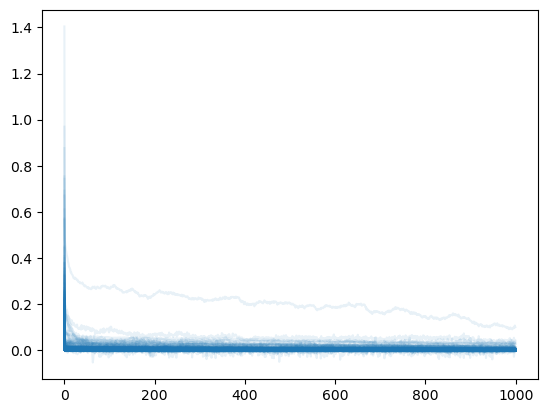

In [10]:
for i in range(2000):
    plt.plot(acov[i,:1000], color='C0', alpha=0.1)

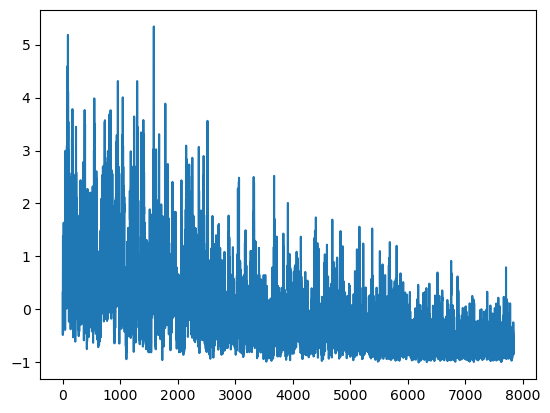

In [13]:
plt.plot(X_demeaned[i_sample[495],:])

In [3]:
path = '/mnt/smb/locker/litwin-kumar-locker/om2382/20210305_both_6mm_FOV_50_550um_depth_350mW_60min_no_stim_M1.h5'
with h5py.File(path, "r") as f:
    print(list(f.keys()))

['T_all', 'Ym', 'fhz', 'motion', 'motion_pcs', 'nx', 'ny', 'nz', 't', 'velocity_events']
